# Dutch Social Media Collection Dataset's Sentiment Analysis

### Install Libraries

In [69]:
# !pip install textblob pandas matplotlib seaborn wordcloud nltk

In [70]:
# !python -m textblob.download_corpora

### Import those Libraries

In [71]:
from textblob import TextBlob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from collections import Counter 
from wordcloud import WordCloud 
from nltk.corpus import stopwords 

### Loading Data - Dutch Social Media Collection.

In [72]:
folderPath = 'data/'
dataframes = []

#Loading Data
for i in range(10):
    filePath = os.path.join(folderPath, f"dutch_tweets_chunk{i}.json")
    if os.path.exists(filePath):
        df = pd.read_json(filePath)
        columnsToUse = ['text_translation', 'screen_name', 'created_at', 'desc_translation']
        existingColumns = [col for col in columnsToUse if col in df.columns]
        df = df[existingColumns]
        dataframes.append(df)
    else:
        print(f"Warning: File not found at {filePath}. Skipping this chunk.")

combinedDf = pd.concat(dataframes, ignore_index=True)

print(f"Total no of tweets loaded: {combinedDf.shape[0]}")
print("Initial DataFrame")
combinedDf[:]

Total no of tweets loaded: 271342
Initial DataFrame


,text_translation,screen_name,created_at,desc_translation
0,@pflegearzt @Friedelkorn @ LAguja44 Pardon wol...,TheoRettich,2020-03-09 12:26:29,"I ❤️science, Therefore a Commie. ☭ FALGSC: Par..."
1,RT @grantshapps: Aviation demand is reduced du...,davidiwanow,2020-03-09 12:26:34,I tweet a lot but love to engage and converse....
2,RT @DDStandaard: The D66 dream come true: COVI...,EricL65,2020-03-09 12:26:37,None
3,RT @DDStandaard: The D66 dream come true: COVI...,EricL65,2020-03-09 12:26:37,None
4,The D66 dream becomes reality: COVID-19 super ...,EhrErwin,2020-03-09 12:26:47,Budget-Life Coach. Time management coaching. h...
...,...,...,...,...
271337,RT @GuityMohebbi: Jointly responsible and full...,laAckxtra,2020-09-10 18:33:23,"While we were sleeping you fought, @laAckxtra ..."
271338,RT @GuityMohebbi: Jointly responsible and full...,laAckxtra,2020-09-10 18:33:23,"While we were sleeping you fought, @laAckxtra ..."
271339,RT @ntvkenya: Covid? What Covid? Scam?\n\nPres...,Leahs_Daughter,2020-09-10 18:33:34,The Bee's Knees! 🇰🇪
271340,@mauricedehond @covid gets to me Maurice pay p...,BruggeXander,2020-09-10 18:33:44,"Cycling enthusiast, Anders Thinker, Critical\n..."


### Cleaning that data.

In [73]:
#Cleaning Data
def cleanText(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

combinedDf['cleaned_text'] = combinedDf['text_translation'].apply(cleanText)
combinedDf['cleaned_desc'] = combinedDf['desc_translation'].apply(cleanText)

combinedDf = combinedDf.drop(columns=['text_translation', 'desc_translation'])

print("Same dataframe after Cleaning")
combinedDf.head()

Same dataframe after Cleaning


,screen_name,created_at,cleaned_text,cleaned_desc
0,TheoRettich,2020-03-09 12:26:29,laguja44 pardon wollte zitieren eigentlich das...,i science therefore a commie falgsc part of a ...
1,davidiwanow,2020-03-09 12:26:34,rt aviation demand is reduced due to covid19 b...,i tweet a lot but love to engage and converse ...
2,EricL65,2020-03-09 12:26:37,rt the d66 dream come true covid19 super letha...,
3,EricL65,2020-03-09 12:26:37,rt the d66 dream come true covid19 super letha...,
4,EhrErwin,2020-03-09 12:26:47,the d66 dream becomes reality covid19 super de...,budgetlife coach time management coaching hate...


### Sentiment Scores and their labels.

In [74]:
def getSentiments(text):
    return TextBlob(text).sentiment.polarity

def getLabels(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

combinedDf['sentiments_score'] = combinedDf['cleaned_text'].apply(getSentiments)
combinedDf['sentiments_label'] = combinedDf['sentiments_score'].apply(getLabels)

print("Dataframe with Sentiment Scores and Labels")
combinedDf.head()

Dataframe with Sentiment Scores and Labels


,screen_name,created_at,cleaned_text,cleaned_desc,sentiments_score,sentiments_label
0,TheoRettich,2020-03-09 12:26:29,laguja44 pardon wollte zitieren eigentlich das...,i science therefore a commie falgsc part of a ...,0.000000,Neutral
1,davidiwanow,2020-03-09 12:26:34,rt aviation demand is reduced due to covid19 b...,i tweet a lot but love to engage and converse ...,0.125000,Positive
2,EricL65,2020-03-09 12:26:37,rt the d66 dream come true covid19 super letha...,,0.341667,Positive
3,EricL65,2020-03-09 12:26:37,rt the d66 dream come true covid19 super letha...,,0.341667,Positive
4,EhrErwin,2020-03-09 12:26:47,the d66 dream becomes reality covid19 super de...,budgetlife coach time management coaching hate...,0.066667,Positive


### Sentiment Count and Pie Chart for Visual Representation of its ratio.

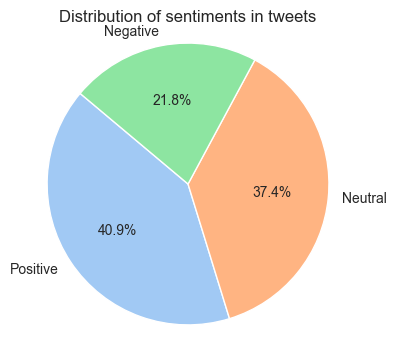

Sentiment Distribution
sentiments_label
Positive    110892
Neutral     101427
Negative     59023
Name: count, dtype: int64


In [75]:
sentiment_counts = combinedDf['sentiments_label'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of sentiments in tweets')
plt.axis('equal')
plt.show()

print("Sentiment Distribution")
print(sentiment_counts)

### Most Common Words and WordCloud.

20 Most Common Words (excluding stopwords)
Corona: 85845
Coronavirus: 40611
People: 24903
Covid19: 24469
Lockdown: 13852
Virus: 13082
New: 12251
Covid: 11813
Also: 11548
Still: 10361
One: 9968
China: 9936
Pandemic: 9139
Netherlands: 8365
Many: 8231
Get: 7972
Government: 7898
Time: 7792
Would: 7492
Good: 6952


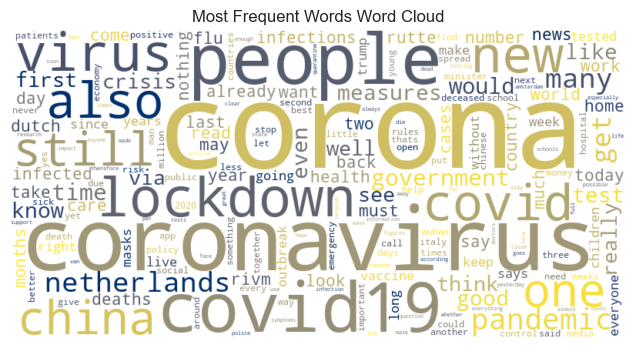

In [76]:
stop_words = set(stopwords.words('english'))
custom_stopwords = {'rt', 'amp', 'co', 'https', 't'} 
stop_words.update(custom_stopwords)

def extract_and_filter_words(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return [word for word in words if word not in stop_words and len(word) > 2]

all_words = []
combinedDf['cleaned_text'].dropna().apply(lambda x: all_words.extend(extract_and_filter_words(x)))

word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

print("20 Most Common Words (excluding stopwords)")
for word, count in most_common_words:
    print(f"{word.title()}: {count}")

if word_counts:
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='cividis').generate_from_frequencies(word_counts)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Frequent Words Word Cloud')
    plt.show()
else:
    print("\nNo words found for word cloud generation after cleaning and stopword removal.")

## Creating a HeatMap

### Install folium library

In [77]:
# !pip install pandas folium

#### Generate HeatMap

In [87]:
import folium
from folium.plugins import HeatMap

folderPath = 'data/'
outputFile = "DutchSocialmediacollectionGeographicalHeatmap.html"

min_lat, max_lat = 24.396308, 49.384358 
min_lon, max_lon = -125.0, -66.93457

print(f"Loading data from '{folderPath}'...")
dataframes = []

for i in range(10):
    filePath = os.path.join(folderPath, f"dutch_tweets_chunk{i}.json")
    if os.path.exists(filePath):
        try:
            df = pd.read_json(filePath)
            columnsToUse = ['latitude', 'longitude', 'created_at', 'text_translation', 'screen_name']
            existingColumns = [col for col in columnsToUse if col in df.columns]
            df = df[existingColumns]
            dataframes.append(df)
        except Exception as e:
            print(f"Error reading {filePath}: {e}. Skipping this chunk.")
    else:
        print(f"Warning: File not found at {filePath}. Skipping this chunk.")

if not dataframes:
    print("No dataframes were loaded. Please ensure your 'data/' folder exists and contains valid JSON files.")
    exit() 

combinedDf2 = pd.concat(dataframes, ignore_index=True)

print(f"Generating Heat Map ...")

combinedDf2['created_at'] = pd.to_datetime(combinedDf2['created_at'], errors='coerce')

geo_data = combinedDf2.dropna(subset=['latitude', 'longitude']).copy()
geo_data = geo_data[(geo_data['latitude'].between(-90, 90)) &
                    (geo_data['longitude'].between(-180, 180))]

geo_data_filtered = geo_data[
    (geo_data['latitude'].between(min_lat, max_lat)) &
    (geo_data['longitude'].between(min_lon, max_lon))
].reset_index(drop=True)

if not geo_data_filtered.empty:
    data_for_heatmap = geo_data_filtered[['latitude', 'longitude']].values.tolist()
    map_center_lat = geo_data_filtered['latitude'].mean()
    map_center_lon = geo_data_filtered['longitude'].mean()
elif not geo_data.empty:
    data_for_heatmap = geo_data[['latitude', 'longitude']].values.tolist()
    map_center_lat = geo_data['latitude'].mean()
    map_center_lon = geo_data['longitude'].mean()
    print("Warning: No tweets found within the specified Netherlands bounding box. Generating heatmap with all available valid geographical data.")
else:
    print("Error: No valid geographical data found to create the heatmap after all filtering steps.")
    print("Please ensure your JSON files contain 'latitude' and 'longitude' columns with numerical coordinates.")
    exit() 

print("Generating interactive heatmap...")
heatmapMap = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=4)

HeatMap(data_for_heatmap).add_to(heatmapMap)
# for saving heat maps uncomment below 2 code of lines
# heatmapMap.save(outputFile)
# print(f"Geographical heatmap successfully saved to {outputFile}")

# To view the image in jupyter itself
# display(heatmapMap)

Loading data from 'data/'...
Generating Heat Map ...
Generating interactive heatmap...
